In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np 
import pandas as pd 

import os
import re
import nltk

In [4]:
train=pd.read_csv('./fake-news/train.csv')
test=pd.read_csv('./fake-news/test.csv')

In [5]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [6]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
dtype: int64


In [7]:
test=test.fillna(' ')

train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

# Creating Wordcloud Visuals

In [42]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

In [8]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 

plt.tight_layout(pad = 0) 
  
plt.show() 

NameError: name 'stopwords' is not defined

# Cleaning and preprocessing 

# 1. Regex

In [9]:

s = "!</> hello"

In [10]:
s = re.sub(r'[^\w\s]','',s)


In [11]:
print(s)

 hello


# 2. Tokenization

In [10]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sudhanshu
[nltk_data]     Chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3. StopWords

In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to C:\Users\Sudhanshu
[nltk_data]     Chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# 4. Lemmatization

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str="been had done languages cities mice"

In [13]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to C:\Users\Sudhanshu
[nltk_data]     Chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Application


In [14]:
lemmatizer=WordNetLemmatizer()

for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence


In [15]:
train = train[['total','label']]

# Applying NLP Techniques

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
X_train = train['total']
Y_train = train['label']

# Bag-of-words / CountVectorizer

In [18]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [19]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# TF-iDF Vectorizer

In [20]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [21]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [24]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

# Application


In [22]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [23]:
tf_idf_matrix

<20800x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 5987666 stored elements in Compressed Sparse Row format>

# Modelling

In [24]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

# Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.98


array([[2493,   71],
       [  44, 2592]], dtype=int64)

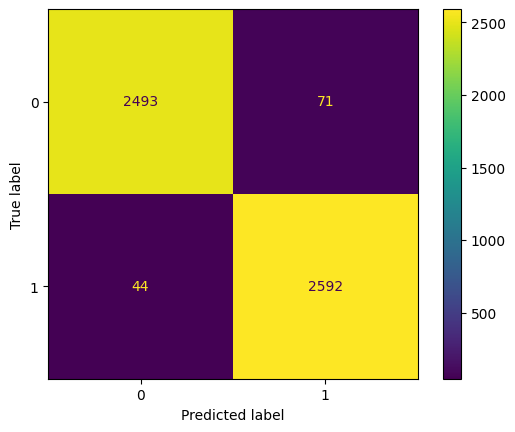

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {0:1.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred, labels=logreg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logreg.classes_)
disp.plot()


cm


# MultinomialNB

Accuracy of NB  classifier on training set: 0.86
Accuracy of NB classifier on test set: 0.81


x------x-----x--------x-----------x-----x----x--x-x


 [[2554   10]
 [ 980 1656]] 



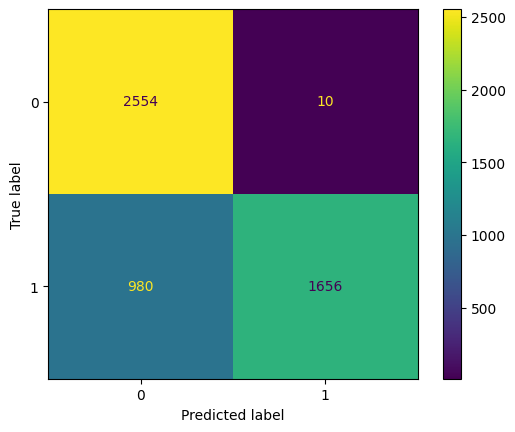

In [67]:
from sklearn.naive_bayes import MultinomialNB

import seaborn as sns
NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}\n'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred, labels=NB.classes_)
print("\nx------x-----x--------x-----------x-----x----x--x-x\n")
print("\n",cm,"\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= NB.classes_)
disp.plot()
plt.show()



# Pipeline

In [26]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [27]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [29]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [36]:
pipeline.predict(["Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times David Streitfeld PALO ALTO, Calif.  â€”   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trumpâ€™s election would â€œrange between disastrous and terrible. â€ Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of â€œangerâ€ and â€œbigotry. â€ Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trumpâ€™s candidacy even as other supporters flee. (He also recently gave $1 million to a â€œsuper PACâ€ that supports Senator Rob Portman, the Republican freshman running for   in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valleyâ€™s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. â€œWeâ€™re a bunch of nerds not used to having a lot of limelight,â€ said Dave McClure, an investor who runs a tech incubator called 500 Startups. â€œBut to quote   â€˜With great power comes great responsibility. â€™â€ Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal   effort. An initial group of donors pledged $50, 000 the goal was to ask the â€œnerdzâ€ for small donations to match that sum. They have not come through yet. â€œWeâ€™re kind of optimistic weâ€™ll get the other $50, 000 in a few weeks,â€ Mr. McClure said. That relatively slow pace reflects Silicon Valleyâ€™s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7. 7 million from the tech community, according to Crowdpac, a   that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire   of the business networking site LinkedIn, offers a snapshot of Silicon Valleyâ€™s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veteransâ€™ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffmanâ€™s outright donations, however, have been smaller this election cycle. In May, he gave $400, 000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, â€œLooking at some PACs, etc. â€ He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield  Byers, who gave $500, 000. The AOL   Steve Case said his September endorsement of Mrs. Clinton, via an   in The Washington Post, was the first time he ever publicly declared for a candidate. â€œI always focused on policy and avoided politics,â€ he said. â€œBut if Trump were elected president, I would be disappointed in myself for not acting. â€ When he wrote the   he was uncertain about donating money to Mrs. Clinton, saying only that it was â€œprobable. â€ A spokeswoman said Sunday that Mr. Case gave $25, 000 to the Hillary Victory Fund. Mason Harrison, Crowdpacâ€™s head of communications, offered a possible reason for Mrs. Clintonâ€™s    support. â€œDonors give to support candidates they love, not to defeat candidates they fear,â€ he said. A few billionaires are acting instead of talking. Dustin Moskovitz, a founder of Facebook, said he was giving $20 million to various Democratic election efforts  â€”   the first time he and his wife, Cari Tuna, have endorsed a candidate. He declined to be interviewed. Part of the problem for Mrs. Clinton is that, however preferable she may be to Mr. Trump in the tech community, she pales in comparison to President Obama. After some initial misgivings, Silicon Valley found its champion in him. There has been a revolving door between tech and the Obama administration, just as previous Democratic administrations had a revolving door with Wall Street. In June, President Obama seemed to suggest that he might become a venture capitalist after his term ends. Mrs. Clinton is not as enthusiastic toward Silicon Valley and its disruptive ways. In a speech in the summer of 2015, she noted that   in the â€œ  or   gig economyâ€  â€”   Uber, Airbnb and their ilk  â€”   were â€œunleashing innovationâ€ but also â€œraising hard questions about workplace protection and what a good job will look like in the future. â€ The Clinton campaign declined to comment. The Trump campaign did not respond to a query. Even as Silicon Valley works against Mr. Trump, there is quiet acknowledgment that his campaign has bared some important issues. In an endorsement this month of Mrs. Clinton, the venture capital firm Union Square Ventures pointed out that â€œthe benefits of technology and globalization have not been evenly distributed,â€ and that this needed to change. If Silicon Valleyâ€™s political involvement outlasts this unusual election, the tech community may start contributing more to the process than commentary and cash. â€œNot only are tech people going to be wielding influence, but theyâ€™re going to be the candidate,â€ Mr. McClure said. â€œReid Hoffman, Sheryl Sandbergâ€  â€”   the chief operating officer of Facebook  â€”   â€œand a bunch of other folks here have political aspirations. â€ Others may be inspired to enter politics through other doors. Palmer Luckey is the    founder of the Oculus virtual reality company, which he sold to Facebook for $2 billion. Mr. Luckey donated $10, 000 to a group dedicated to spreading    messages about Mrs. Clinton both online and off. The groupâ€™s first billboard, said to be outside Pittsburgh, labeled her â€œToo Big to Jail. â€ Mr. Luckey told The Daily Beast that his thinking â€œwent along the lines of, â€˜Hey, I have a bunch of money. I would love to see more of this stuff. â€™â€ He added, â€œI thought it sounded like a real jolly good time. â€ Many virtual reality developers were less happy, and Mr. Luckey quickly posted his regrets on Facebook. He declined to comment further. â€œIf weâ€™re going to be more vocal, weâ€™ll have to live more transparently,â€ said Hunter Walk, a venture capitalist whose campaign to persuade tech companies to give workers Election Day off signed up nearly 300 firms, including Spotify, SurveyMonkey and TaskRabbit. â€œThere will be a period of adjustment. â€ But perhaps being vocal is a temporary condition after all. The venture firm CRV was in the spotlight at the end of August with its blunt   message, which included the earthy epithet. A few weeks later, it cleaned up its website. The partners went from employing a publicist to seek out attention to declining interviews. â€œWe reached everyone we wanted to reach, and hopefully influenced opinions,â€ said Saar Gur, a CRV venture capitalist. â€œThen the buzz died down and we went back to our day jobs, which are super busy. â€"])

array([1], dtype=int64)

In [38]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [39]:
filename = './pipeline.sav'

# Prediction

In [41]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["PALO ALTO, Calif.  â€”   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trumpâ€™s election would â€œrange between disastrous and terrible. â€ Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of â€œangerâ€ and â€œbigotry. â€ Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trumpâ€™s candidacy even as other supporters flee. (He also recently gave $1 million to a â€œsuper PACâ€ that supports Senator Rob Portman, the Republican freshman running for   in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valleyâ€™s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. â€œWeâ€™re a bunch of nerds not used to having a lot of limelight,â€ said Dave McClure, an investor who runs a tech incubator called 500 Startups. â€œBut to quote   â€˜With great power comes great responsibility. â€™â€ Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal   effort. An initial group of donors pledged $50, 000 the goal was to ask the â€œnerdzâ€ for small donations to match that sum. They have not come through yet. â€œWeâ€™re kind of optimistic weâ€™ll get the other $50, 000 in a few weeks,â€ Mr. McClure said. That relatively slow pace reflects Silicon Valleyâ€™s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7. 7 million from the tech community, according to Crowdpac, a   that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire   of the business networking site LinkedIn, offers a snapshot of Silicon Valleyâ€™s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veteransâ€™ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffmanâ€™s outright donations, however, have been smaller this election cycle. In May, he gave $400, 000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, â€œLooking at some PACs, etc. â€ He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield  Byers, who gave $500, 000. The AOL   Steve Case said his September endorsement of Mrs. Clinton, via an   in The Washington Post, was the first time he ever publicly declared for a candidate. â€œI always focused on policy and avoided politics,â€ he said. â€œBut if Trump were elected president, I would be disappointed in myself for not acting. â€ When he wrote the   he was uncertain about donating money to Mrs. Clinton, saying only that it was â€œprobable. â€ A spokeswoman said Sunday that Mr. Case gave $25, 000 to the Hillary Victory Fund. Mason Harrison, Crowdpacâ€™s head of communications, offered a possible reason for Mrs. Clintonâ€™s    support. â€œDonors give to support candidates they love, not to defeat candidates they fear,â€ he said. A few billionaires are acting instead of talking. Dustin Moskovitz, a founder of Facebook, said he was giving $20 million to various Democratic election efforts  â€”   the first time he and his wife, Cari Tuna, have endorsed a candidate. He declined to be interviewed. Part of the problem for Mrs. Clinton is that, however preferable she may be to Mr. Trump in the tech community, she pales in comparison to President Obama. After some initial misgivings, Silicon Valley found its champion in him. There has been a revolving door between tech and the Obama administration, just as previous Democratic administrations had a revolving door with Wall Street. In June, President Obama seemed to suggest that he might become a venture capitalist after his term ends. Mrs. Clinton is not as enthusiastic toward Silicon Valley and its disruptive ways. In a speech in the summer of 2015, she noted that   in the â€œ  or   gig economyâ€  â€”   Uber, Airbnb and their ilk  â€”   were â€œunleashing innovationâ€ but also â€œraising hard questions about workplace protection and what a good job will look like in the future. â€ The Clinton campaign declined to comment. The Trump campaign did not respond to a query. Even as Silicon Valley works against Mr. Trump, there is quiet acknowledgment that his campaign has bared some important issues. In an endorsement this month of Mrs. Clinton, the venture capital firm Union Square Ventures pointed out that â€œthe benefits of technology and globalization have not been evenly distributed,â€ and that this needed to change. If Silicon Valleyâ€™s political involvement outlasts this unusual election, the tech community may start contributing more to the process than commentary and cash. â€œNot only are tech people going to be wielding influence, but theyâ€™re going to be the candidate,â€ Mr. McClure said. â€œReid Hoffman, Sheryl Sandbergâ€  â€”   the chief operating officer of Facebook  â€”   â€œand a bunch of other folks here have political aspirations. â€ Others may be inspired to enter politics through other doors. Palmer Luckey is the    founder of the Oculus virtual reality company, which he sold to Facebook for $2 billion. Mr. Luckey donated $10, 000 to a group dedicated to spreading    messages about Mrs. Clinton both online and off. The groupâ€™s first billboard, said to be outside Pittsburgh, labeled her â€œToo Big to Jail. â€ Mr. Luckey told The Daily Beast that his thinking â€œwent along the lines of, â€˜Hey, I have a bunch of money. I would love to see more of this stuff. â€™â€ He added, â€œI thought it sounded like a real jolly good time. â€ Many virtual reality developers were less happy, and Mr. Luckey quickly posted his regrets on Facebook. He declined to comment further. â€œIf weâ€™re going to be more vocal, weâ€™ll have to live more transparently,â€ said Hunter Walk, a venture capitalist whose campaign to persuade tech companies to give workers Election Day off signed up nearly 300 firms, including Spotify, SurveyMonkey and TaskRabbit. â€œThere will be a period of adjustment. â€ But perhaps being vocal is a temporary condition after all. The venture firm CRV was in the spotlight at the end of August with its blunt   message, which included the earthy epithet. A few weeks later, it cleaned up its website. The partners went from employing a publicist to seek out attention to declining interviews. â€œWe reached everyone we wanted to reach, and hopefully influenced opinions,â€ said Saar Gur, a CRV venture capitalist. â€œThen the buzz died down and we went back to our day jobs, which are super busy. â€"])
print(result) 

[1]
